In [49]:
from IPython.lib.display import YouTubeVideo
from sklearn.linear_model import RidgeCV, Ridge, LassoCV, LinearRegression,Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math


In [4]:
import sklearn
print(sklearn.__version__)

1.2.2


In [5]:
df = pd.read_excel('pH Relation.xlsx')
#Clean DATE
df['DATE'] = pd.to_datetime(df['DATE'])
df['DATE'] = df['DATE'].dt.date

#Delete blank
df = df.dropna(subset=['pH'], axis=0)
df = df.dropna(subset=['Ammonia/ppm'], axis=0)
df = df.dropna(subset=['Sulfide/ppm'], axis=0)
df = df.dropna(subset=['Chloride/ppm'], axis=0)
# #Clean crude diet
# label_encoder = LabelEncoder()
# df['Numerical_diet'] = label_encoder.fit_transform(df['Crude diet'])

# df['H+'] = df['pH'].apply(lambda x: math.exp(-x))
# df['Ammonia/ppb'] = df['Ammonia/ppm']*1000
# df['Sulfide/ppb'] = df['Sulfide/ppm']*1000
# df['Chloride/ppb'] = df['Chloride/ppm']*1000
#resetindex
df.reset_index(drop=True, inplace=True)
#plot
# sns.scatterplot(data = df, x = "pH", y='Ammonia/ppm')
# plt.show()
# sns.scatterplot(data = df, x = "pH", y='Sulfide/ppm')
# plt.show()
# sns.scatterplot(data = df, x = "pH", y='Chloride/ppm')
# plt.show()


In [6]:
print(df)

           DATE  IOW(In/Out)    pH  Ammonia/ppm  Sulfide/ppm  Chloride/ppm   
0    2022-12-06            0   5.5          2.0        0.034        1.0200  \
1    2022-12-07            0   5.5          9.0        0.088        1.0280   
2    2022-12-22            1  8.58         18.0        0.070        0.7090   
3    2022-12-23            1  8.58         18.0        0.070        0.7090   
4    2022-12-25            1  8.35         56.0        0.120        1.7564   
..          ...          ...   ...          ...          ...           ...   
134  2023-08-27            0  5.87         71.0        2.000        6.2000   
135  2023-08-28            0  6.67         30.0        0.020        6.9127   
136  2023-08-30            0  7.98         52.0        0.060        6.2037   
137  2023-09-01            1  8.51         74.0        0.040        4.4312   
138  2023-09-04            1     9         90.0        0.020        6.9127   

     Iron/ppm  Oil&Grease/ppm  DO/ppm   
0       0.500         

In [7]:
df2 = df.iloc[:,8:11]
df2.head()

,DO/ppm,Crude diet,Crude ratio
0,6.0,BEN-WTM-UJU-PAT-SIB-SHGO-GIR,32-23-17-17-5-3-2
1,7.0,BEN-WTM-UJU-PAT-SIB-SHGO-GIR,32-23-17-17-5-3-3
2,4.0,GIR-UJU-WTM-SLGO-SIB-SHGO-SWD-KIS-JSM-SVD,25-15-14-11-9-8-7-6-4-1
3,4.0,GIR-UJU-WTM-SLGO-SIB-SHGO-SWD-KIS-JSM-SVD,25-15-14-11-9-8-7-6-4-1
4,3.5,WTM-GIR-BEN-JSM-PAT-SIB-UJU,30-22-17-17-6-5-2


In [8]:
df_new = []

for _, row in df.iterrows():
    crude_list = row['Crude diet'].split('-')
    ratio_list = list(map(int, row['Crude ratio'].split('-')))
    
    # Create a dictionary mapping crude names to their ratios
    crude_ratio_dict = dict(zip(crude_list, ratio_list))
    
    # Convert the dictionary to a DataFrame and append to the list
    df_new.append(pd.DataFrame([crude_ratio_dict]))

# Concatenate the DataFrames
result_df = pd.concat(df_new, ignore_index=True)

print(result_df)

#the output is a list of individual dataframes


      BEN   WTM   UJU   PAT  SIB  SHGO   GIR  SLGO  SWD   KIS  ...  DAR  SUT   
0    32.0  23.0  17.0  17.0    5   3.0   2.0   NaN  NaN   NaN  ...  NaN  NaN  \
1    32.0  23.0  17.0  17.0    5   3.0   3.0   NaN  NaN   NaN  ...  NaN  NaN   
2     NaN  14.0  15.0   NaN    9   8.0  25.0  11.0  7.0   6.0  ...  NaN  NaN   
3     NaN  14.0  15.0   NaN    9   8.0  25.0  11.0  7.0   6.0  ...  NaN  NaN   
4    17.0  30.0   2.0   6.0    5   NaN  22.0   NaN  NaN   NaN  ...  NaN  NaN   
..    ...   ...   ...   ...  ...   ...   ...   ...  ...   ...  ...  ...  ...   
134   NaN   1.0   NaN  19.0    3   1.0  34.0   NaN  NaN   NaN  ...  NaN  NaN   
135   NaN   1.0   NaN  19.0    3   1.0  34.0   NaN  NaN   NaN  ...  NaN  NaN   
136   NaN   1.0   NaN  17.0    2   NaN  44.0   NaN  NaN   NaN  ...  NaN  NaN   
137   NaN   NaN   1.0  15.0    6   NaN  44.0   NaN  NaN   NaN  ...  NaN  NaN   
138   NaN   NaN   NaN   NaN    2   NaN  27.0   NaN  NaN  15.0  ...  NaN  NaN   

      CHA  SSR  MAO  LAB  RBL   MR1  MA

In [9]:
print(df_new[:5])

[   BEN  WTM  UJU  PAT  SIB  SHGO  GIR
0   32   23   17   17    5     3    2,    BEN  WTM  UJU  PAT  SIB  SHGO  GIR
0   32   23   17   17    5     3    3,    GIR  UJU  WTM  SLGO  SIB  SHGO  SWD  KIS  JSM  SVD
0   25   15   14    11    9     8    7    6    4    1,    GIR  UJU  WTM  SLGO  SIB  SHGO  SWD  KIS  JSM  SVD
0   25   15   14    11    9     8    7    6    4    1,    WTM  GIR  BEN  JSM  PAT  SIB  UJU
0   30   22   17   17    6    5    2]


In [10]:
#concatenate list of dataframes vertically to create a single dataframe

df_combined = pd.concat(df_new, ignore_index=True)
print(df_combined)

      BEN   WTM   UJU   PAT  SIB  SHGO   GIR  SLGO  SWD   KIS  ...  DAR  SUT   
0    32.0  23.0  17.0  17.0    5   3.0   2.0   NaN  NaN   NaN  ...  NaN  NaN  \
1    32.0  23.0  17.0  17.0    5   3.0   3.0   NaN  NaN   NaN  ...  NaN  NaN   
2     NaN  14.0  15.0   NaN    9   8.0  25.0  11.0  7.0   6.0  ...  NaN  NaN   
3     NaN  14.0  15.0   NaN    9   8.0  25.0  11.0  7.0   6.0  ...  NaN  NaN   
4    17.0  30.0   2.0   6.0    5   NaN  22.0   NaN  NaN   NaN  ...  NaN  NaN   
..    ...   ...   ...   ...  ...   ...   ...   ...  ...   ...  ...  ...  ...   
134   NaN   1.0   NaN  19.0    3   1.0  34.0   NaN  NaN   NaN  ...  NaN  NaN   
135   NaN   1.0   NaN  19.0    3   1.0  34.0   NaN  NaN   NaN  ...  NaN  NaN   
136   NaN   1.0   NaN  17.0    2   NaN  44.0   NaN  NaN   NaN  ...  NaN  NaN   
137   NaN   NaN   1.0  15.0    6   NaN  44.0   NaN  NaN   NaN  ...  NaN  NaN   
138   NaN   NaN   NaN   NaN    2   NaN  27.0   NaN  NaN  15.0  ...  NaN  NaN   

      CHA  SSR  MAO  LAB  RBL   MR1  MA

In [11]:
df_combined = df_combined.fillna(0)
print(df_combined)

      BEN   WTM   UJU   PAT  SIB  SHGO   GIR  SLGO  SWD   KIS  ...  DAR  SUT   
0    32.0  23.0  17.0  17.0    5   3.0   2.0   0.0  0.0   0.0  ...  0.0  0.0  \
1    32.0  23.0  17.0  17.0    5   3.0   3.0   0.0  0.0   0.0  ...  0.0  0.0   
2     0.0  14.0  15.0   0.0    9   8.0  25.0  11.0  7.0   6.0  ...  0.0  0.0   
3     0.0  14.0  15.0   0.0    9   8.0  25.0  11.0  7.0   6.0  ...  0.0  0.0   
4    17.0  30.0   2.0   6.0    5   0.0  22.0   0.0  0.0   0.0  ...  0.0  0.0   
..    ...   ...   ...   ...  ...   ...   ...   ...  ...   ...  ...  ...  ...   
134   0.0   1.0   0.0  19.0    3   1.0  34.0   0.0  0.0   0.0  ...  0.0  0.0   
135   0.0   1.0   0.0  19.0    3   1.0  34.0   0.0  0.0   0.0  ...  0.0  0.0   
136   0.0   1.0   0.0  17.0    2   0.0  44.0   0.0  0.0   0.0  ...  0.0  0.0   
137   0.0   0.0   1.0  15.0    6   0.0  44.0   0.0  0.0   0.0  ...  0.0  0.0   
138   0.0   0.0   0.0   0.0    2   0.0  27.0   0.0  0.0  15.0  ...  0.0  0.0   

      CHA  SSR  MAO  LAB  RBL   MR1  MA

In [12]:
#merge two dataframes horizontally

df_merged = pd.concat([df, df_combined], axis=1)

In [13]:
print(df_merged)

           DATE  IOW(In/Out)    pH  Ammonia/ppm  Sulfide/ppm  Chloride/ppm   
0    2022-12-06            0   5.5          2.0        0.034        1.0200  \
1    2022-12-07            0   5.5          9.0        0.088        1.0280   
2    2022-12-22            1  8.58         18.0        0.070        0.7090   
3    2022-12-23            1  8.58         18.0        0.070        0.7090   
4    2022-12-25            1  8.35         56.0        0.120        1.7564   
..          ...          ...   ...          ...          ...           ...   
134  2023-08-27            0  5.87         71.0        2.000        6.2000   
135  2023-08-28            0  6.67         30.0        0.020        6.9127   
136  2023-08-30            0  7.98         52.0        0.060        6.2037   
137  2023-09-01            1  8.51         74.0        0.040        4.4312   
138  2023-09-04            1     9         90.0        0.020        6.9127   

     Iron/ppm  Oil&Grease/ppm  DO/ppm   
0       0.500         

In [14]:
#excel_file = "export01.xlsx"
#df_merged.to_excel(excel_file, index=False)

In [15]:
X = pd.concat([df_merged.iloc[:, 3:6], df_merged.iloc[:, 11:51]], axis=1)
Y = df['IOW(In/Out)']

In [16]:
print(X)

     Ammonia/ppm  Sulfide/ppm  Chloride/ppm   BEN   WTM   UJU   PAT  SIB   
0            2.0        0.034        1.0200  32.0  23.0  17.0  17.0    5  \
1            9.0        0.088        1.0280  32.0  23.0  17.0  17.0    5   
2           18.0        0.070        0.7090   0.0  14.0  15.0   0.0    9   
3           18.0        0.070        0.7090   0.0  14.0  15.0   0.0    9   
4           56.0        0.120        1.7564  17.0  30.0   2.0   6.0    5   
..           ...          ...           ...   ...   ...   ...   ...  ...   
134         71.0        2.000        6.2000   0.0   1.0   0.0  19.0    3   
135         30.0        0.020        6.9127   0.0   1.0   0.0  19.0    3   
136         52.0        0.060        6.2037   0.0   1.0   0.0  17.0    2   
137         74.0        0.040        4.4312   0.0   0.0   1.0  15.0    6   
138         90.0        0.020        6.9127   0.0   0.0   0.0   0.0    2   

     SHGO   GIR  ...  DAR  SUT   CHA  SSR  MAO  LAB  RBL   MR1  MAO.   CHI  
0     3.0 

In [24]:
# Split data
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True)

**DECISION TREE** 

In [30]:
clf = DecisionTreeClassifier()

# Step 5: Train the Decision Tree classifier on the training data
clf.fit(X_train, Y_train)

# Step 6: Make predictions on the testing data
Y_pred = clf.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 68.57%


**RANDOM FOREST** 

Accuracy: 68.57%
[[ 2  5]
 [ 6 22]]


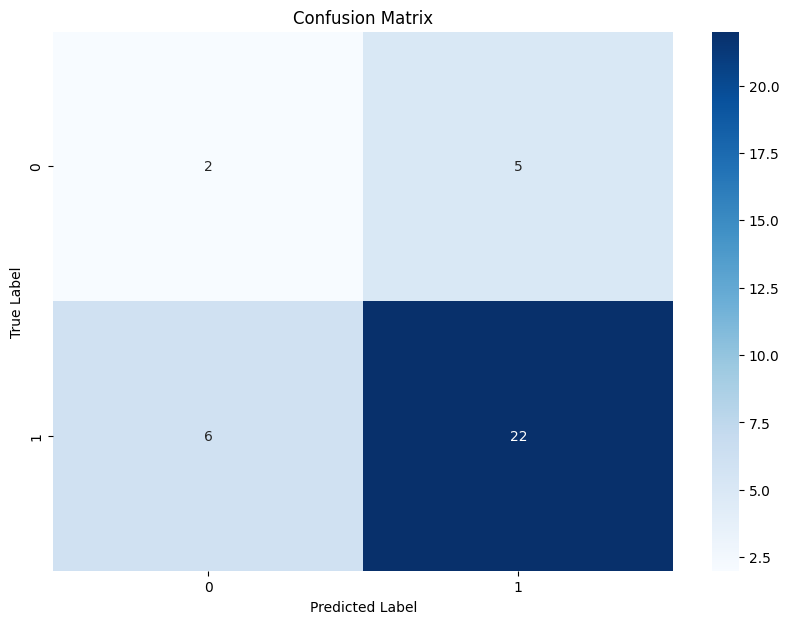

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(Y_test, Y_pred)

print(cm)

classes = list(set(Y_test))  # This gets the unique class names for labeling

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

**LOGISTIC REGRESSION** 

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Logistic Regression model
clf = LogisticRegression()
clf.fit(X_train, Y_train)

# Predictions
Y_pred = clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 62.86%

Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.14      0.13         7
           1       0.78      0.75      0.76        28

    accuracy                           0.63        35
   macro avg       0.45      0.45      0.45        35
weighted avg       0.65      0.63      0.64        35


Confusion Matrix:
 [[ 1  6]
 [ 7 21]]


**SUPPORT VECTOR MACHINE (SVM)** 

In [39]:
clf = SVC(kernel='linear')
clf.fit(X_train, Y_train)

# Predictions
Y_pred = clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("SVM Classification Report:\n", classification_report(Y_test, Y_pred))
print("\nSVM Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 65.71%
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.29      0.25         7
           1       0.81      0.75      0.78        28

    accuracy                           0.66        35
   macro avg       0.51      0.52      0.51        35
weighted avg       0.69      0.66      0.67        35


SVM Confusion Matrix:
 [[ 2  5]
 [ 7 21]]


**GRADIENT BOOSTING** 

In [51]:
# Gradient Boosting Model
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, max_depth=3, random_state=42)
gb_clf.fit(X_train, Y_train)

# Predictions
Y_pred_gb = gb_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(Y_test, Y_pred_gb)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Gradient Boosting Classification Report:\n", classification_report(Y_test, Y_pred_gb))
print("\nGradient Boosting Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_gb))

Accuracy: 80.00%
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.84      0.93      0.88        28

    accuracy                           0.80        35
   macro avg       0.67      0.61      0.62        35
weighted avg       0.77      0.80      0.78        35


Gradient Boosting Confusion Matrix:
 [[ 2  5]
 [ 2 26]]


**TUNING HYPERPARAMETERS**

In [50]:
# Example parameters grid. Adjust based on your knowledge and dataset characteristics.
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'max_depth': [3, 4, 5],
    'subsample': [0.5, 0.8, 1],
    'max_features': ['auto', 'sqrt', 'log2']
}

gb_clf = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

c:\Users\26005064\Desktop\T-II GPT\.venv\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\26005064\Desktop\T-II GPT\.venv\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\26005064\Desktop\T-II GPT\.venv\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\26005064\Desktop\T-II GPT\.venv\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, expli

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 200, 'subsample': 1}
Best Score: 0.7504761904761905


c:\Users\26005064\Desktop\T-II GPT\.venv\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\26005064\Desktop\T-II GPT\.venv\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\26005064\Desktop\T-II GPT\.venv\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\26005064\Desktop\T-II GPT\.venv\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, expli